## Installazioni

Qualora non fossero già presenti sul dispositivo preposto ad eseguire questo file, occorre installare i seguenti packages 

In [46]:
#!pip install -U imbalanced-learn
#!pip install imblearn
#!pip install imblearn
#!pip install -c glemaitre imbalanced-learn
#!pip install imblearn==0.0

#!pip uninstall scikit-learn -y --quiet
#!pip install -U scikit-learn --quiet

#!pip install python-dotenv --quiet
#!pip install sklearn-genetic --quiet
#!pip install tabulate

Il set di dati preso in questione include 61069 ipotetici funghi con cappello basati su 173 specie (353 funghi
per specie). Ogni fungo è identificato come sicuramente commestibile, decisamente velenoso o di
commestibilità sconosciuta e sconsigliata (quest'ultima classe è combinata con la classe velenosa).
gli attributi del set sono i seguenti:
                                           
Una classe binaria divisa in commestibile=e e velenosa=p (con quest'ultima contenente anche funghi di commestibilità sconosciuta).
Venti variabili rimanenti (n: nominale, m: metrico)
1. diametro del tappo (m): numero float in cm
2. forma del cappuccio (n): campana=b, conica=c, convessa=x, piatta=f,affondato=s, sferico=p, altri=o
3. superficie della calotta (n): fibrosa=i, scanalature=g, squamosa=y, liscia=s,lucido=h, coriaceo=l, setoso=k, appiccicoso=t,rugoso=w, carnoso=e
4. colore del cappuccio (n): marrone=n, buff=b, grigio=g, verde=r, rosa=p,viola=u, rosso=e, bianco=w, giallo=y, blu=l,arancione=o, nero=k
5. fa-lividi-emorragia (n): lividi-o-emorragia=t,no=f
6. attacco branchiale (n): adnato=a, annesso=x, decorrente=d, libero=e,sinuate=s, pori=p, nessuno=f, sconosciuto=?
7. spaziatura branchiale (n): vicino=c, lontano=d, none=f
8. gill-color (n): vedi cap-color + none=f
9. altezza stelo (m): numero galleggiante in cm
10. stelo-larghezza (m): numero galleggiante in mm
11. radice-gambo (n): bulbosa=b, gonfia=s, mazza=c, coppa=u, uguale=e,rizomorfi=z, radicati=r
12. stem-surface (n): vedi cap-surface + none=f
13. stem-color (n): vedi cap-color + none=f
14. velo-tipo (n): parziale=p, universale=u
15. colore-velo (n): vedi colore-berretto + nessuno=f
16. anello-ha (n): anello=t, nessuno=f
17. tipo ad anello (n): ragnatela=c, evanescente=e, svasato=r, scanalato=g,grande=l, pendente=p, guaina=s, zona=z, squamoso=y, mobile=m, nessuno=f, sconosciuto=?
18. spore-print-color (n): vedi colore cappuccio
19. habitat (n): erbe=g, foglie=l, prati=m, sentieri=p, brughiere=h,urbano=u, rifiuti=w, bosco=d
20. stagione (n): primavera=s, estate=u, autunno=a, inverno=s
                                                          
il dataset è reperibile dal seguente link :http://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset
                                                          
Le metriche di valutazione da utilizzare sono: 

Accuracy: $$\frac{\text{# oggetti classificati correttamente}}{\text{# oggetti}}$$

Precision class $i$: $$\frac{\text{# oggetti della classe $i$ classificati correttamente}}{\text{# oggetti classificati come classe $i$}}$$

Recall class $i$: $$\frac{\text{# oggetti della classe $i$ classificati correttamente}}{\text{# oggetti della classe $i$}}$$

F-score class $i$: $$\frac{\text{Precision classe $i$} \times \text{Recall classe $i$}}{\text{Precision classe $i$}+\text{Recall classe $i$}}$$

                                                          

In [47]:
import pandas as pd
import sklearn
import numpy as np
import io
import datetime
from tabulate import tabulate

from sklearn.metrics import log_loss,f1_score,confusion_matrix,accuracy_score, classification_report,precision_score,recall_score

from sklearn.feature_selection import mutual_info_classif,SelectKBest

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer


from sklearn.ensemble import ExtraTreesClassifier
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek 

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV,GridSearchCV,RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from sklearn import datasets
import plotly.express as px

Per inziare lo studio si è caricando sul notebook il dataset per convertirlo in dataframe. Alcuni valori del dataframe sono stati stampati in output tramite le funzioni head() e describe(), al fine di analizzarne il contenuto (le funzioni stampano le prime x righe (ne sono state scelte 15)

In [48]:
ms= pd.read_csv('./secondary_data.csv')
ms.head(15)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,...,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,...,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,...,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,...,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,...,s,y,w,u,w,t,p,NaN,d,w


attraverso l'ausilio della funzione describe() si evince che solamente tre features sono numeriche 

In [49]:
ms.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


si procede dunque con il valutare quanti elementi sono presenti in ogni classe. il dataset si presenta bilanciato. procediamo con eliminare gli oggetti ridondanti del dataset al fine di minimizzare la computazione senza perdere qualità informativa .

In [50]:
ms['class'].value_counts()

p    33888
e    27181
Name: class, dtype: int64

In [51]:
ms = ms.drop_duplicates() 
ms['class'].value_counts()

p    33742
e    27181
Name: class, dtype: int64

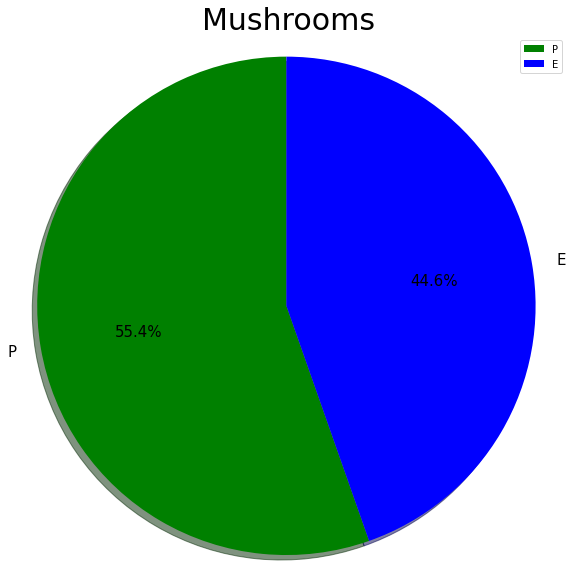

In [52]:
col = ['green','blue']
lab = ['P','E']
valori = ms['class'].value_counts()/ms['class'].shape[0]

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(valori, labels=lab , colors = col, autopct='%1.1f%%', textprops={'fontsize': 15},
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(lab)
ax1.set_title('Mushrooms', size=30)


plt.show()

# Preprocessing

Per prima cosa è opportuno fare del preprocessing sul Dataset perché è noto che gli algoritmi di apprendimento beneficiano di una rielaborazione dei dati. Il preprocessing è a sua volta suddiviso nei seguenti passi:

-Feature Selection

-Gestione degli outliers

-Scaling dei dati


Attraverso la funzione info() si nota che esistono diversi attributi classificati come Null e che le restanti features sono di tipo object. Le colonne 11,14,15 e 18 hanno meno del 20% di valori non nulli. Si procede quindi con la loro eliminazione

In [53]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60923 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  object 
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  object 
 3   cap-surface           46803 non-null  object 
 4   cap-color             60923 non-null  object 
 5   does-bruise-or-bleed  60923 non-null  object 
 6   gill-attachment       51068 non-null  object 
 7   gill-spacing          35861 non-null  object 
 8   gill-color            60923 non-null  object 
 9   stem-height           60923 non-null  float64
 10  stem-width            60923 non-null  float64
 11  stem-root             9387 non-null   object 
 12  stem-surface          22801 non-null  object 
 13  stem-color            60923 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [54]:
for i in [18,15,14,11]:
    ms = ms.drop(ms.columns[i], axis = 1)

In [55]:
ms

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,y,w,t,g,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,y,w,t,g,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,y,w,t,g,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,y,w,t,p,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,y,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,6.22,NaN,y,f,f,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,5.43,NaN,y,f,f,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,6.37,NaN,y,f,f,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,5.44,NaN,y,f,f,d,u


Esistono altri valori Null, quindi per ogni colonna che li contiene, la funzione value_counts() conta quante volte è contenuto ogni elmento, per poi andare a sostituire il valore Null relativo alla colonna in questione con il piu frequente in essa contenuto.Per il dataset in questione questa operazione risulta come forzatura,ma è stato scelto comunque di usarla al fine didattico per permettere l'esecuzione di classificatori tipo SVM

In [56]:
ms['cap-surface'].value_counts()

t    8184
s    7580
y    6341
h    4974
g    4722
d    4432
e    2584
k    2303
i    2225
w    2150
l    1308
Name: cap-surface, dtype: int64

In [57]:
for i in [3,6,7,11,14]:
    ms[ms.columns[i]]= ms[ms.columns[i]].fillna(ms[ms.columns[i]].value_counts().index[0])
    
ms.isnull().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [58]:
ms['cap-surface'].value_counts()

t    22304
s     7580
y     6341
h     4974
g     4722
d     4432
e     2584
k     2303
i     2225
w     2150
l     1308
Name: cap-surface, dtype: int64

La funzione LabelEncoder() converte i valori di tipo stringa in valori numerici che sono più pratici da analizzare 

In [59]:
labelencoder=LabelEncoder()
for column in ms.columns:
    if column != 'cap-diameter' and column != 'stem-height' and column != 'stem-width':
        ms[column] = labelencoder.fit_transform(ms[column])
        
ms.describe()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
count,60923.000000,60923.000000,60923.000000,60923.000000,60923.000000,60923.000000,60923.000000,60923.000000,60923.000000,60923.000000,60923.000000,60923.000000,60923.000000,60923.000000,60923.000000,60923.000000,60923.000000
mean,0.553847,6.741957,4.044039,6.064458,6.150813,0.173826,2.109335,0.239532,7.347340,6.597202,12.178484,4.817983,8.444331,0.248954,1.451078,0.625215,1.052115
std,0.497096,5.268435,2.140562,3.066892,3.169221,0.378963,2.206416,0.542436,3.181149,3.358757,10.030361,1.251903,3.206965,0.432410,1.469892,1.267027,1.100313
min,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.490000,2.000000,3.000000,5.000000,0.000000,0.000000,0.000000,5.000000,4.650000,5.250000,5.000000,6.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,5.880000,5.000000,8.000000,5.000000,0.000000,1.000000,0.000000,7.000000,5.960000,10.220000,5.000000,11.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,8.550000,6.000000,8.000000,10.000000,0.000000,4.000000,0.000000,10.000000,7.750000,16.580000,5.000000,11.000000,0.000000,1.000000,1.000000,2.000000
max,1.000000,62.340000,6.000000,10.000000,11.000000,1.000000,6.000000,2.000000,11.000000,33.920000,103.910000,7.000000,12.000000,1.000000,7.000000,7.000000,3.000000


In [60]:
ms['class'].value_counts()


1    33742
0    27181
Name: class, dtype: int64

si evince che attraverso la label encoder la classe poisonable ora è indicizzata con il valore 1, mentre la classe editable con il valore 0.

Poiché il Dataset è generato da un primary ridotto, sembra un csv ordinato e quindi lasciandolo in questo stato risulterebbe scomodo per le seguenti analisi. Dunque, al fine di avere una situazione piu realistica, si sfrutta la funzione shuffle() per mischiare i vari elementi del Dataset. Esso viene poi diviso in training set e test set

In [61]:
a=int(0.2*ms['class'].count())
b=ms['class'].count()-a

mst = sklearn.utils.shuffle(ms)
np.random.shuffle(mst.values)

ms_train=mst.iloc[:b]
ms_test=mst.iloc[-a:]

## Gestione degli outliers

Gli outliers sono valori anomali e dannosi per i classificatori in quanto ne peggiorano le performance.

Per Dataset di grandi dimensioni la presenza di outliers è da dare per scontata. Dai grafici, infatti, si può osservare la presenza di valori anomali che vanno gestiti in fase di preprocessing.

Per questa fase sono stati scelte solamente le 3 colonne con valori reali dal momento che, per le altre con valori discreti, non ha senso parlare di outliers visto che si tratta di variaili categoriche.

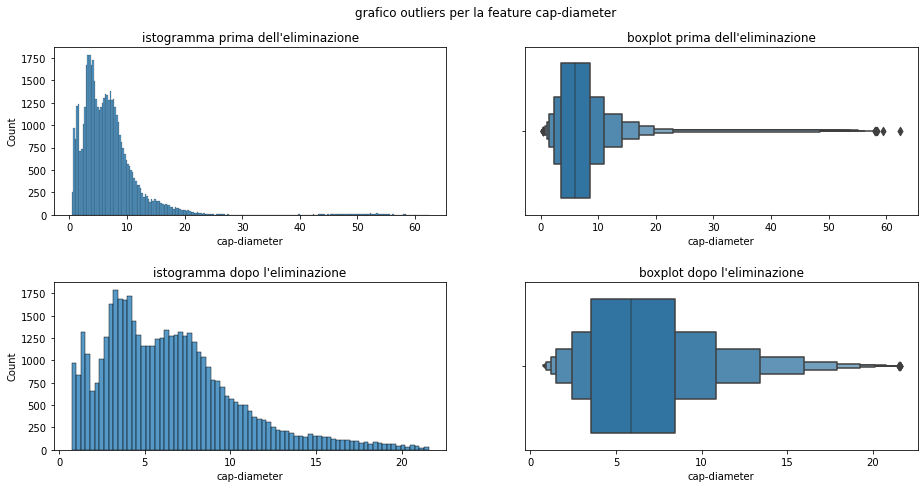

In [62]:
fig, axes = plt.subplots(2,2, figsize=(15,7))
fig.suptitle("grafico outliers per la feature cap-diameter")

sns.histplot(ax = axes[0,0], x=ms_train['cap-diameter'])
axes[0,0].set_title("istogramma prima dell'eliminazione")

sns.boxenplot(ax=axes[0,1], x=ms_train['cap-diameter'])
axes[0,1].set_title("boxplot prima dell'eliminazione")

limite_superiore =ms_train['cap-diameter'].quantile(0.99)
limite_inferiore = ms_train['cap-diameter'].quantile(0.01)
msn_train = ms_train[(ms_train['cap-diameter'] <= limite_superiore) & (ms_train['cap-diameter'] >= limite_inferiore)]

sns.histplot(ax=axes[1,0], x=msn_train['cap-diameter'])
axes[1,0].set_title("istogramma dopo l'eliminazione")

sns.boxenplot(ax=axes[1,1], x=msn_train['cap-diameter'])
axes[1,1].set_title("boxplot dopo l'eliminazione")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

plt.show()

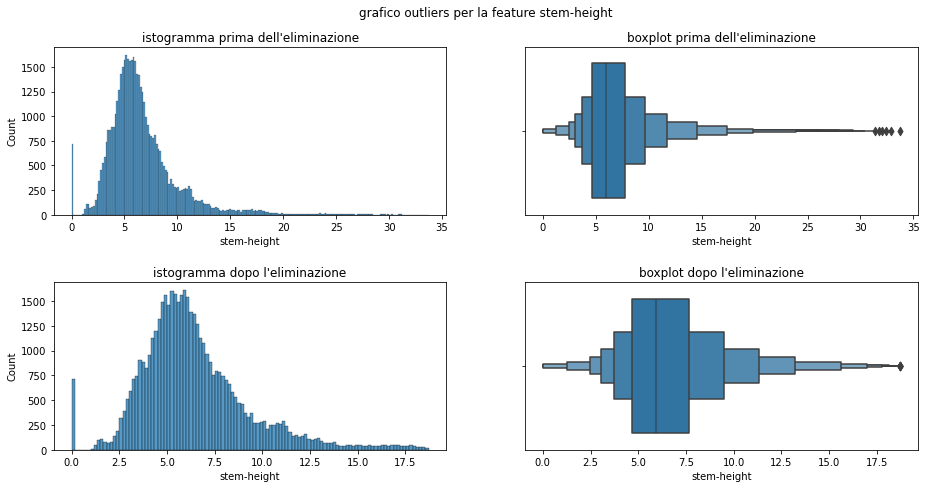

In [63]:
fig, axes = plt.subplots(2,2, figsize=(15,7))
fig.suptitle("grafico outliers per la feature stem-height")

sns.histplot(ax = axes[0,0], x=msn_train['stem-height'])
axes[0,0].set_title("istogramma prima dell'eliminazione")

sns.boxenplot(ax=axes[0,1], x=msn_train['stem-height'])
axes[0,1].set_title("boxplot prima dell'eliminazione")

limite_superiore =msn_train['stem-height'].quantile(0.99)
limite_inferiore = msn_train['stem-height'].quantile(0.01)
msc_train = msn_train[(msn_train['stem-height'] <= limite_superiore) & (msn_train['stem-height'] >= limite_inferiore)]

sns.histplot(ax=axes[1,0], x=msc_train['stem-height'])
axes[1,0].set_title("istogramma dopo l'eliminazione")

sns.boxenplot(ax=axes[1,1], x=msc_train['stem-height'])
axes[1,1].set_title("boxplot dopo l'eliminazione")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

plt.show()

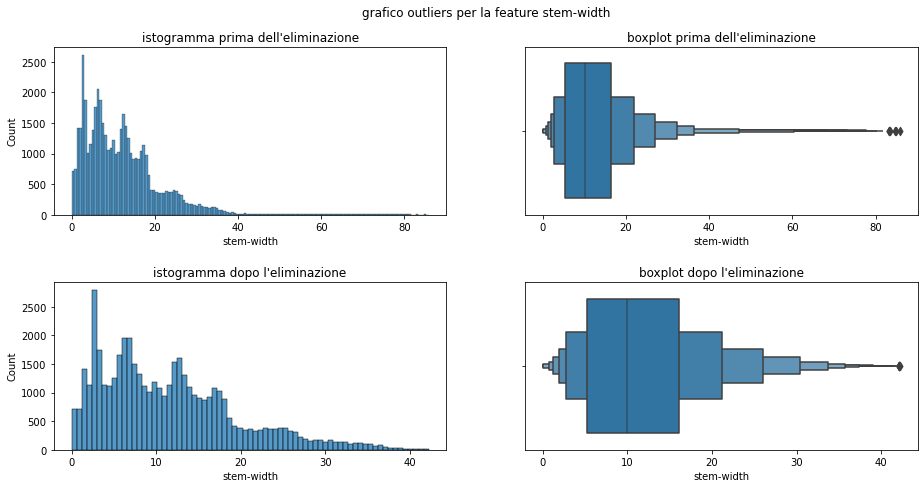

In [64]:
fig, axes = plt.subplots(2,2, figsize=(15,7))
fig.suptitle("grafico outliers per la feature stem-width")

sns.histplot(ax = axes[0,0], x=msc_train['stem-width'])
axes[0,0].set_title("istogramma prima dell'eliminazione")

sns.boxenplot(ax=axes[0,1], x=msc_train['stem-width'])
axes[0,1].set_title("boxplot prima dell'eliminazione")

limite_superiore =msc_train['stem-width'].quantile(0.99)
limite_inferiore = msc_train['stem-width'].quantile(0.01)
msd_train = msc_train[(msc_train['stem-width'] <= limite_superiore) & (msc_train['stem-width'] >= limite_inferiore)]

sns.histplot(ax=axes[1,0], x=msd_train['stem-width'])
axes[1,0].set_title("istogramma dopo l'eliminazione")

sns.boxenplot(ax=axes[1,1], x=msd_train['stem-width'])
axes[1,1].set_title("boxplot dopo l'eliminazione")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

plt.show()

In [65]:
y_train=msd_train.iloc[:,0]
x_train=msd_train.iloc[:,1:]

y_test=ms_test.iloc[:,0]
x_test=ms_test.iloc[:,1:]

features=["cap-diameter" , "cap-shape", "cap-surface", "cap-color", "does-bruise-or-bleed", "gill-attachment", "gill-spacing",
         "gill-color", "stem-height", "stem-width", "stem-surface", "stem-color", "has-ring", "ring-type", "habitat", "season" ]


classes =["0", "1"]

# Feature Selection

La feature selection è una tecnica statistica che ha come obiettivo la riduzione del numero di colonne di un dataset. 
Ridurre la dimensionalità dei dati porta a diversi benefici tra i quali un minor tempo computazionale e in generale un miglioramento delle performance dei modelli.
In questo caso, però, il dataset non possiede una grande quantità di features (alcune delle quali sono già state eliminate a causa della sovrabbondanza di volori Null), pertanto tale tecnica non porterà ad una notevole riduzione computazionale, o a gradi camiamenti a livello predittivo.
Per la feature selection verrano utilizzate le seguenti tecniche:

1. Mutua Informazione

2. Matrice di Correlazione

3. Decisional Tree Classifier


## Mutua informazione

La *Mutua informazione* $I(X,Y)$ è un valore positivo che misura l'indipendenza di due variabili aleatorie.

L'utilizzo della Mutua informazione per la feature selection consiste nello scartare le feature che hanno un coefficiente di **mi** piccolo in quanto non mostrano relazione di dipendenza con il target.

In [66]:
mui=mutual_info_classif(x_train, y_train)
mui

array([0.0213059 , 0.02557076, 0.02562578, 0.02962577, 0.0022134 ,
       0.0234958 , 0.00730683, 0.01905629, 0.03167459, 0.05450138,
       0.04645839, 0.04501285, 0.00218161, 0.02714099, 0.01689127,
       0.00896985])

In [67]:
ordered_terms = np.flip(np.argsort(mui),0)
#ordered_terms[:10]
fe=[]
for i in ordered_terms:
    fe.append(features[i])
    
fe

['stem-width',
 'stem-surface',
 'stem-color',
 'stem-height',
 'cap-color',
 'ring-type',
 'cap-surface',
 'cap-shape',
 'gill-attachment',
 'cap-diameter',
 'gill-color',
 'habitat',
 'season',
 'gill-spacing',
 'does-bruise-or-bleed',
 'has-ring']

osservando la mutua informazione, si nota che alcuni valori tendono molto velocemente a 0. Risultano quindi superflue le colonne relative a tali valori, portando cosi alla riduzione dello spazio dimensionale del dataset. 

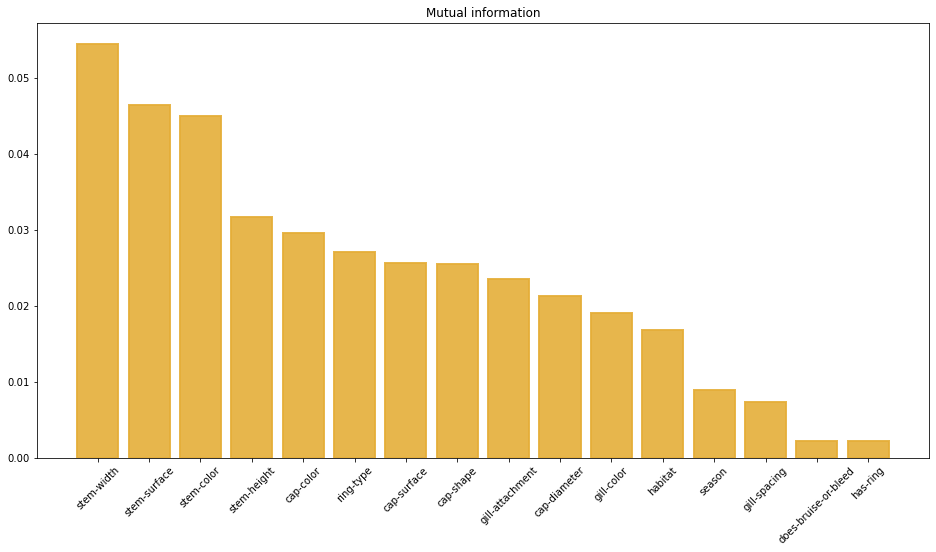

In [68]:
k=16
colors = ['#008fd5', '#fc4f30', '#e5ae38']# facecolor=colors[2], edgecolor=colors[2]
fig=plt.figure(figsize=(16,8))
plt.bar(range(k),mui[ordered_terms], alpha=0.9,facecolor=colors[2], edgecolor=colors[2] , lw=2)
plt.xticks(range(k), fe,rotation = 45)
plt.title(r"Mutual information")

plt.show()

In [69]:
model = SelectKBest(mutual_info_classif, k=12)
model.fit(x_train, y_train)

x_train_mi = model.transform(x_train) ##applicazione della FS ai dati
x_test_mi = model.transform(x_test)

### Matrice di Correlazione

La matrice di correlazione è una tabella quadrata, ossia con lo stesso numero di righe e di colonne, che mostra i coefficienti di correlazione tra coppie di variabili. Si tratta, in definitiva, di un prospetto che permette di valutare, nell’insieme, il grado di interdipendenza di una serie di grandezze.
La tabella è simmetrica e si divide in tre parti, che ora andremo ad esaminare.

La diagonale

La linea diagonale taglia il prospetto andando dall’alto a sinistra al basso a destra. Essa racchiude il grado di correlazione di una grandezza con se stessa. Per questo motivo i valori che vi si trovano sono pari ad uno. Spesso la diagonale è lasciata vuota, a causa della sua scarsa utilità pratica.

I triangoli

Al di sopra ed al di sotto della diagonale abbiamo le coppie dei coefficienti di correlazione. Poiché il grado di dipendenza tra la variabile “A” e la grandezza “B” è il medesimo se si inverte l’ordine, le due parti della tabella avranno gli stessi valori.

Il prospetto, pertanto, può essere letto considerando solo una delle due metà. Per tale ragione la matrice è simmetrica.

L'utilizzo della matrice di correlazione per la feature selection consiste in due fasi:

1. Eliminare le feature non correlate a sufficienza con il target.

2. Eliminare le feature troppo correlate fra loro.

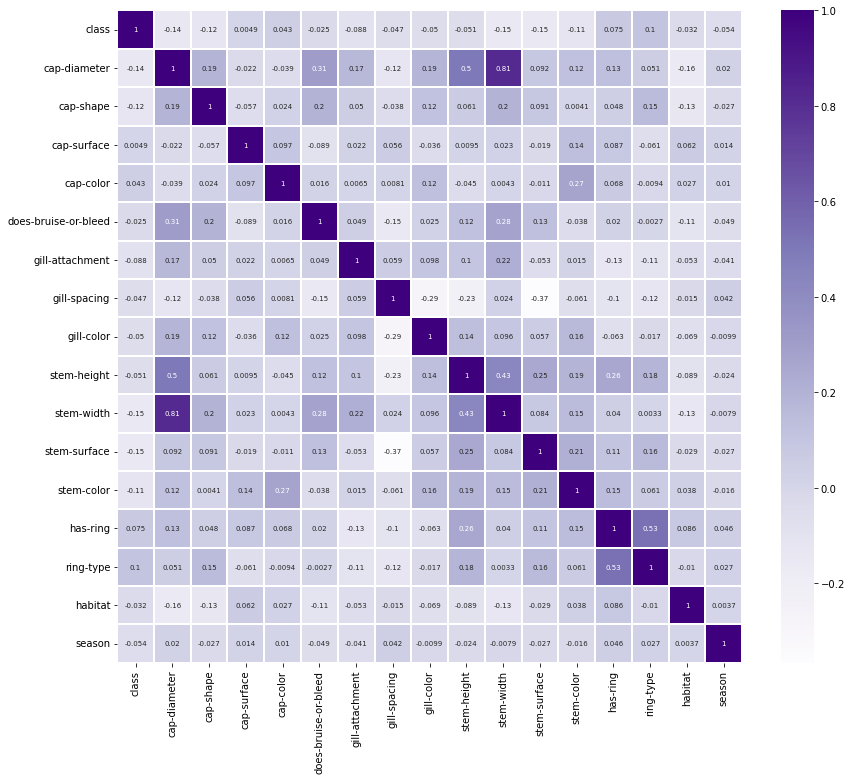

In [70]:
plt.figure(figsize=(14,12))
sns.heatmap(msd_train.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

Dalla matrice si evidenzia la presenza di una forte correlazione tra due fueatures: cap-diameter e stem-width. Essendo quest'ultima quella meno correlata con la classe, è opportuno eliminarla.

In [71]:
x_train_mc = x_train.drop(x_train.columns[9], axis = 1)
x_test_mc = x_test.drop(x_test.columns[9], axis = 1)
x_test_mc

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-surface,stem-color,has-ring,ring-type,habitat,season
12895,0.72,6,2,11,0,0,0,11,3.36,5,11,0,1,0,2
16765,8.13,2,2,5,0,5,0,5,9.94,3,6,0,1,0,0
60273,6.82,3,8,5,0,3,2,2,2.95,1,6,0,1,0,1
35649,10.22,6,10,5,0,0,0,5,11.51,7,12,1,1,0,0
17256,5.90,6,8,11,0,5,1,11,5.70,3,12,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8189,3.35,6,8,5,0,6,0,7,7.74,5,8,0,1,0,0
17614,7.73,6,0,10,0,5,0,10,8.11,5,11,0,1,4,1
29644,3.53,2,9,6,1,1,0,5,3.81,5,6,0,1,0,2
43956,12.27,2,10,10,0,2,0,4,18.89,5,11,1,0,1,1


### Decision Tree


Questa tecnica di feature selection sfrutta la costruzione di alberi di decisione caratterizzati da una particolare splitting rule.

Viene selezionato un sottoinsieme di attributi, e per ognuno di essi vengono generate randomicamente delle soglie tra le quali poi, solo la migliore verrà scelta come effettiva regola di suddivisione. In questo modo la varianza del modello viene ridotto pagando però come prezzo un aumento, se pur lieve, del bias.

Andiamo a selezionare i k attributi di importanza più alta quindi.

In [72]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

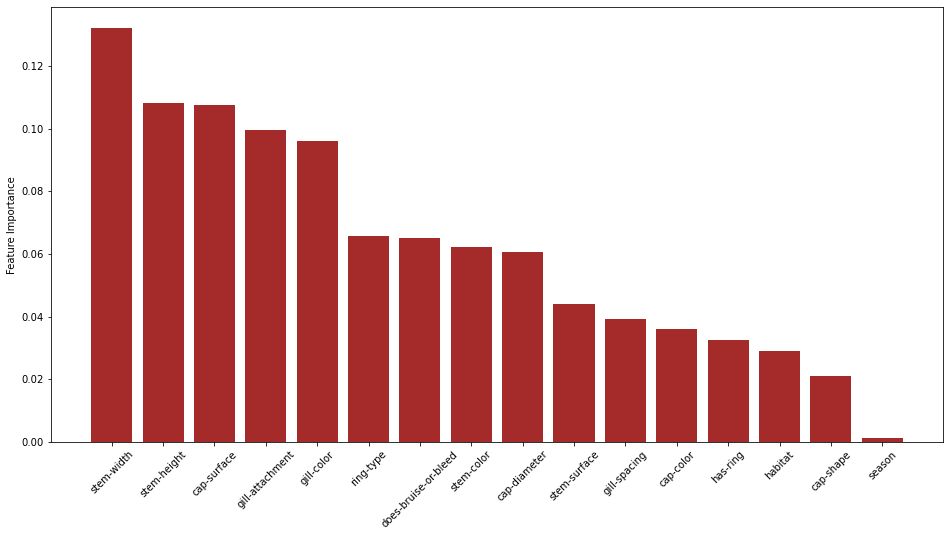

In [73]:
features_list = x_train.columns.values
feature_importance = dt.feature_importances_
sorted_id = np.argsort(feature_importance)
sorted_idx = sorted_id[::-1]

plt.figure(figsize=(16,8))
plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="brown")
plt.xticks(range(len(sorted_idx)), features_list[sorted_idx],rotation=45)
plt.ylabel('Feature Importance')
plt.draw()
plt.show()

In [74]:
k=8
x_train_dt=x_train
x_test_dt=x_test    
for i in range(k):
    x_train_dt = x_train_dt.drop(features[sorted_id[i]], axis = 1)
    x_test_dt = x_test_dt.drop(features[sorted_id[i]], axis = 1)

In [75]:
x_train_dt

,cap-surface,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,ring-type
33070,4,0,0,7,4.55,2.41,11,1
31771,5,0,5,7,3.99,2.78,6,1
53746,7,0,1,11,5.57,31.25,6,1
1883,8,0,2,10,6.44,12.98,11,2
36640,7,0,0,11,7.37,7.47,12,7
...,...,...,...,...,...,...,...,...
18535,10,0,5,11,5.59,15.74,12,1
34764,2,0,0,5,5.64,2.78,6,1
35793,8,0,0,5,4.18,6.05,7,7
46391,8,0,6,10,6.28,3.72,11,1


## FEATURES EXTRACTION

La features extraction serve anch'essa a ridurre la dimensionalità del dataset ma, contrariamente alla selection, essa permette di mappare le features del dataset originale in un altro spazio di dimensione minore.

### Principal Component Analysis (PCA) 
la PCA è una riduzione della dimensionalità lineare: si effettua una trasformazione lineare delle variabili, che proietta quelle originarie in un nuovo sistema cartesiano, di dimensioni uguali o inferiori a quello originale, nel quale le variabili vengono ordinate in ordine decrescente di varianza. Pertanto, la variabile con maggiore varianza viene proiettata sul primo asse, la seconda sul secondo asse e così via.  
Quando nel dataset c’è una forte correlazione tra i dati, si utilizza PCA per ridurre la dimensionalità, in modo da trasformare il dataset di partenza in un dataset di dimensioni inferiori, senza perdere però informazioni importanti. 
Utilizzando tale tecnica, il dataset originale, che potrebbe avere molte variabili, viene ad essere interpretato solo da poche variabili, dette componenti principali, che diventano il nuovo insieme di variabili, ottenuto dall'insieme iniziale. Le componenti principali sono calcolate in modo tale che le nuove variabili ottenute siano altamente significative e indipendenti l'una dall'altra.

Mappando i dati in uno spazio più piccolo, la PCA cerca di mantenere la varianza dei dati originali, in modo tale da garantire stime più accurate con uno sforzo computazionale inferiore da parte del modello. 

In particolare si mappano i dati in uno spazio dimensionale $d^I$ definito dagli autovettori relativi ai massimi autovalori che garantiscono quindi maggiore varianza.


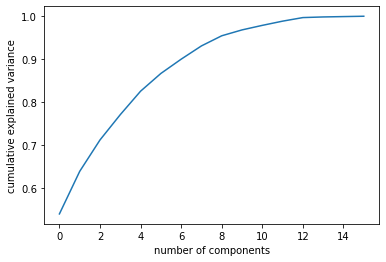

In [76]:
pca = PCA(n_components=16)
x_train_pca=pca.fit_transform(x_train) 
x_test_pca=pca.transform(x_test)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

si evince come con 10 features è possibile ottenere circa il 95% dell'informazione, pertanto con la PCA si è deciso di fare features extraction per ridurre la complessità del dataset.

In [77]:
pca = PCA(n_components=10)
x_train_pca=pca.fit_transform(x_train) 
x_test_pca=pca.transform(x_test)


si procede ora con l'esaminare i vari classificatori,e dopo aver settato i parametri in maniera corretta attraverso la tecnica di cross validation, si andrà a riconsocere il classificatore più idoneo per la risoluzione del problema in questione

# CLASSIFICAZIONE
Un fattore importante nelle prestazioni dei modelli sono gli iper-parametri dei classificatori, in quanto possono influenzare in modo significativo le prestazioni di un modello.  
Per ognuno dei classificatori si cercano i valori ottimali per gli iper-parametri di un modello utilizzando una HalvingGridSearchCV. 
Per far ciò,viene definito un dizionario, chiamato “param_grid”, in cui va inserito un determinato iper-parametro dello specifico classificatore insieme ai valori che può assumere. HalvingGridSearchCV, al contrario della GridSearchCV che prova tutte le varie combinazioni dei valori passati nella param_grid, adotta un approccio chiamato *dimezzamento successivo*. Alla prima iterazione, addestra tutti i candidati su una piccola parte dei dati di training e seleziona i migliori. Alle iterazioni successive, solo tali candidati vengono addestrati nuovamente su una porzione maggiore di dati. In questo modo, si evita di procedere con il test di tutte le combinazioni possibili di iperparametri e si riduce il tempo computazionale per fare CV. Esso poi valuta il modello per ogni combinazione utilizzando il metodo della k-fold Cross Validation, avente un valore di cv pari a 5.  

è evidente, dalle caratteristiche del datset in questione, che i classificatori lineari non otterranno dei buoni risultati nell'ambito della predizione.
In seguito verrano elencati alcuni di essi al fine di dimostrare quanto appena detto.

Tra le metriche utilizzate per la scelta del miglior classificatore una elevata rilevanza, oltre che all'F1-score, è stata data alla Recall della classe poisonus. Questo perchè un falso positivo e un falso negativo in questa situazione hanno importanza diversa. è meglio cioè classificare correttamente tutti i funghi velenosi a scapito di altri edibili mal classificati, piuttosto che il contrario.  

In [78]:
target_names = ['class E', 'class P']

#  SVC

Un classificatore SVM, o classificatore di macchine vettoriali di supporto, è un tipo di algoritmo di apprendimento automatico che può essere utilizzato per analizzare e classificare i dati. Un SVC è un algoritmo di apprendimento automatico supervisionato che può essere utilizzato sia per attività di classificazione che di regressione. Tale classificatore funziona trovando l'iperpiano, nello spazio N-dimensionale dei dati, che massimizza il margine tra le due classi. Esso è un potente strumento per l'apprendimento automatico ed è stato ampiamente utilizzato in molte attività come il riconoscimento delle cifre scritte a mano, il riconoscimento delle espressioni facciali e la classificazione del testo. Support vector machine presenta molti vantaggi rispetto ad altri algoritmi di apprendimento automatico, come la robustezza al rumore e la capacità di gestire set di dati di grandi dimensioni.
SVM può essere utilizzato per risolvere problemi non lineari utilizzando le funzioni del kernel. Ad esempio, il popolare kernel RBF (usato in questo progetto) può essere utilizzato per mappare i punti dati in uno spazio dimensionale superiore in modo che diventino separabili linearmente. Una volta mappati i punti dati, SVM troverà l'iperpiano ottimale in questo nuovo spazio che può separare i punti dati in due classi.

In [33]:
model = SVC(C=1.2, probability=True, decision_function_shape = 'ovo') # ovo perché multiclasse
model.fit(x_train,y_train)

SVC(C=1.2, decision_function_shape='ovo', probability=True)

In [ ]:
# Model Training
model = SVC()

param_grid = {
    'C': np.arange(0.2,3.0, 0.1)
}

clf7 = HalvingGridSearchCV(estimator = model, cv=5, param_grid=param_grid, scoring='f1_macro')
clf7.fit(x_train,y_train)

print(clf7.best_params_)


              precision    recall  f1-score   support

     class E       0.95      0.93      0.94      5513
     class P       0.94      0.96      0.95      6671

    accuracy                           0.94     12184
   macro avg       0.94      0.94      0.94     12184
weighted avg       0.94      0.94      0.94     12184



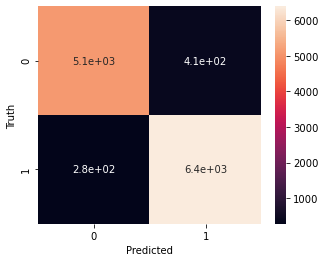

In [34]:
y_pred = model.predict(x_test)
P = model.predict_proba(x_test)

F1_SVC = f1_score(y_test, y_pred, average='macro')
AC_SVC = accuracy_score(y_test, y_pred)
RC_SVC= recall_score(y_test, y_pred,average=None)

print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Logistic Regression

La regressione logistica fa parte della famiglia degli approcci discriminativi in cui si assume direttamente che la probabilità condizionata $P(C_k | x)$ sia un generalized linear model (GLM). Con una stima ML (massima likelyhood) si derivano così direttamente i coefficienti del modello.
Da una combinazione lineare delle features si passa alla probabilità condizionata di appartenenza ad ua classe tramite la funzione sigmoide applicata ad essa.

$$ \sigma_ w (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^- w^Tx }  $$ 

Per giungere ai parametri del modello si stima quindi che gli elementi target del training set possano essere modellati tramite una distribuzione di Bernoulli:

$$P(t_i|x_i, w ) = p_i ^{t_i} (1-p_i)^{1-t_i}$$

In [90]:
model = LogisticRegression( max_iter=800);
model.fit(x_train, y_train)

LogisticRegression(max_iter=800)

In [80]:
# Model Training
model = LogisticRegression()

param_grid = {
    'max_iter': ( 400, 500, 600, 700, 800, 900, 1000)
}

clf7 = HalvingGridSearchCV(estimator = model, cv=5, param_grid=param_grid, scoring='f1_macro')
clf7.fit(x_train,y_train)

print(clf7.best_params_)


{'max_iter': 800}


              precision    recall  f1-score   support

     class E       0.60      0.49      0.54      5398
     class P       0.65      0.74      0.69      6786

    accuracy                           0.63     12184
   macro avg       0.62      0.62      0.62     12184
weighted avg       0.63      0.63      0.62     12184



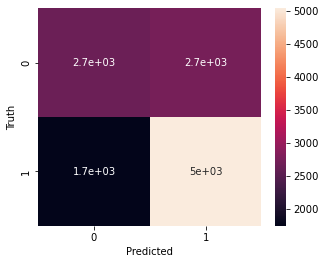

In [92]:
y_pred = model.predict(x_test)
Predict = model.predict_proba(x_test)

F1_LogReg = f1_score(y_test, y_pred, average='macro')
AC_LogReg = accuracy_score(y_test, y_pred)
RC_LogReg = recall_score(y_test, y_pred,average=None)

print(classification_report(y_test, y_pred, target_names=target_names))


cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels= classes    ,yticklabels=  classes )
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Gaussian Naive Bayes
Naive Bayes è un algoritmo probabilistico di apprendimento automatico che può essere utilizzato in diverse attività di classificazione. Le applicazioni tipiche di Naive Bayes sono la classificazione dei documenti, il filtraggio dello spam, la previsione e così via. Questo algoritmo si basa sulle scoperte di Thomas Bayes e da qui il suo nome.

Il nome "Naïve" viene utilizzato perché l'algoritmo utilizza nel suo modello una ipotesi semplificativa. Eventuali modifiche al valore di una feature non influiscono direttamente sul valore di qualsiasi altra featuresdell'algoritmo. Esse sono, cioè, una volta stabilita l'appartenenza ad una specifica classe, indipendenti l'una dalle altre, semplificando così notevolmente la predizione.

In [88]:
model = GaussianNB(var_smoothing= 0.01);
model.fit(x_train, y_train)


GaussianNB(var_smoothing=0.01)

In [36]:
# Model Training
model = GaussianNB()

param_grid = {
    'var_smoothing': (1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10 )
}

clf7 = HalvingGridSearchCV(estimator = model, cv=5, param_grid=param_grid, scoring='f1_macro')
clf7.fit(x_train,y_train)

print(clf7.best_params_)


{'var_smoothing': 0.1}


              precision    recall  f1-score   support

     class E       0.60      0.49      0.54      5398
     class P       0.65      0.74      0.69      6786

    accuracy                           0.63     12184
   macro avg       0.62      0.62      0.62     12184
weighted avg       0.63      0.63      0.62     12184



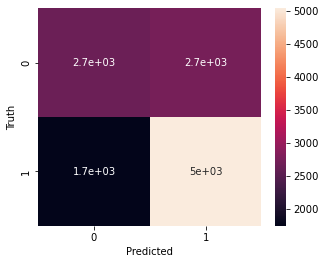

In [93]:
# Model Evaluation
y_pred = model.predict(x_test)
P = model.predict_proba(x_test)

F1_GausNB = f1_score(y_test, y_pred, average='macro')
AC_GausNB = accuracy_score(y_test, y_pred)

RC_GausNB = recall_score(y_test, y_pred,average=None)

print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)


# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Linear discriminant analysis


L'analisi discriminante lineare (LDA), nota anche come analisi discriminante normale o analisi della funzione discriminante, è una tecnica di riduzione della dimensionalità dello spazio del dataset, che viene proiettato in uno spazio di dimensione inferiore, dove poi si risolvono problemi di classificazione supervisionati.
Essa come dice il nome è lineare, pertanto si suppone a priori che con questo dataset non produrrà risultati soddisfacenti.

In [55]:
model = LinearDiscriminantAnalysis(solver= 'eigen', tol= 1e-09)
model.fit(x_train, y_train)

LinearDiscriminantAnalysis(solver='eigen', tol=1e-09)

In [53]:
model = LinearDiscriminantAnalysis()

param_grid = {
        'solver':['svd', 'lsqr', 'eigen'],
        'tol': (1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10)

}


gsearch = HalvingGridSearchCV(estimator= model,  param_grid = param_grid, scoring='f1_macro', cv=5, n_jobs=4)
gsearch.fit(x_train, y_train)
print(gsearch.best_params_)

{'solver': 'eigen', 'tol': 1e-09}


              precision    recall  f1-score   support

     class E       0.61      0.46      0.52      5513
     class P       0.63      0.75      0.69      6671

    accuracy                           0.62     12184
   macro avg       0.62      0.61      0.60     12184
weighted avg       0.62      0.62      0.61     12184



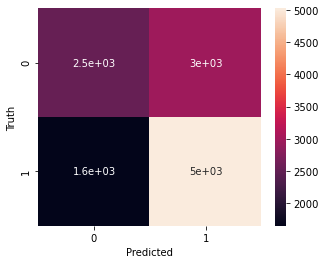

In [57]:
P = model.predict_proba(x_test)
y_pred = model.predict(x_test)


F1_QDA = f1_score(y_test, y_pred, average='macro')
AC_QDA = accuracy_score(y_test, y_pred)
RC_QDA = recall_score(y_test, y_pred,average=None)

print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Alberi di decisione
Gli alberi di classificazione (o di segmentazione) rappresentano una metodologia che ha l’obiettivo di ottenere una segmentazione gerarchica di un insieme di unità statistiche mediante l’individuazione di “regole” (o “percorsi”) che sfruttano la relazione esistente tra una classe di appartenenza e le variabili rilevate per ciascuna unità.

Essi vengono utilizzati per individuare l’appartenenza di unità statistiche alle classi di una variabile dipendente conoscendo i valori o le modalità di una o più variabili esplicative (albero esplorativo).
La regola individuata viene successivamente impiegata per classificare nuove unità statistiche di cui si ignora la categoria di appartenenza (albero decisionale)

In [58]:
model = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes= 380, min_samples_split= 2,  splitter= "random" )
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=380,
                       splitter='random')

In [41]:
model = DecisionTreeClassifier()
# Model Training
param_grid = { 'criterion': ['gini', 'entropy'],
               'splitter': ['best', 'random'],
               'max_leaf_nodes': [ 370,375,380],
               'min_samples_split': [2,3, 4, 5],
 }

clf = HalvingGridSearchCV(estimator = model, cv=5, param_grid=param_grid)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_leaf_nodes': 380, 'min_samples_split': 2, 'splitter': 'random'}


              precision    recall  f1-score   support

     class E       1.00      0.97      0.98      5513
     class P       0.98      1.00      0.99      6671

    accuracy                           0.99     12184
   macro avg       0.99      0.99      0.99     12184
weighted avg       0.99      0.99      0.99     12184



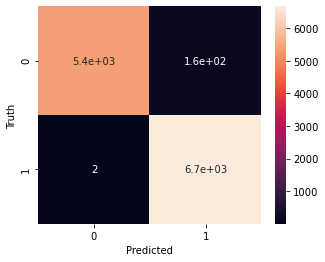

In [59]:
y_pred = model.predict(x_test)
P = model.predict_proba(x_test)

F1_DecTree = f1_score(y_test, y_pred, average='macro')
AC_DecTree = accuracy_score(y_test, y_pred)
RC_DecTree = recall_score(y_test, y_pred,average=None)

print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes ,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Random forest

Random Forest è un potente e versatile algoritmo di apprendimento automatico supervisionato che cresce e combina più alberi decisionali per creare una "foresta".
L'insieme di alberi di Random Forest genera la moda (classificazione) o la media (regressione) dei singoli alberi. Questo metodo consente risultati più accurati e stabili basandosi su una moltitudine di alberi anziché su un singolo albero decisionale.

La logica alla base del modello Random Forest è che più modelli non correlati (i singoli alberi decisionali) funzionano molto meglio come gruppo che da soli. Quando si utilizza Random Forest per la classificazione, ogni albero fornisce una classificazione o un "voto". La foresta sceglie la classifica con la maggioranza dei “voti”. Quando si utilizza Random Forest per la regressione, la foresta preleva la media degli output di tutti gli alberi.

La chiave qui sta nel fatto che c'è una bassa (o nessuna) correlazione tra i singoli modelli, cioè tra gli alberi decisionali che compongono il più ampio modello Random Forest. Mentre gli alberi decisionali individuali possono produrre errori, la maggior parte del gruppo sarà corretta, spostando così il risultato complessivo nella giusta direzione.

l'algoritmo Random Forest si basa sul Bagging per la generaione di alberi e della tecnica del Bootstrap per il loro addestramento. L'elemento random risiede nella scelta della soglia di separazione per la generazione dei figli di ogni albero. 

In [60]:
model = RandomForestClassifier(min_samples_leaf=1, min_samples_split= 4, n_estimators= 100)
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=4)

In [337]:
# Model Training
param_grid = {
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2,3,4],
    'n_estimators': [90,100,110]
}
clf = HalvingGridSearchCV(estimator = model, cv=5, param_grid=param_grid)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 90}


              precision    recall  f1-score   support

     class E       1.00      0.98      0.99      5513
     class P       0.98      1.00      0.99      6671

    accuracy                           0.99     12184
   macro avg       0.99      0.99      0.99     12184
weighted avg       0.99      0.99      0.99     12184



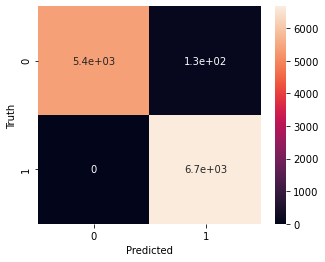

In [61]:
y_pred = model.predict(x_test)
P = model.predict_proba(x_test)

F1_RandFor = f1_score(y_test, y_pred, average='macro')
AC_RandFor = accuracy_score(y_test, y_pred)
RC_RandFor = recall_score(y_test, y_pred,average=None)

print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## KNN

K-nearest neighbors (KNN) è un tipo di algoritmo di apprendimento supervisionato utilizzato sia per la regressione che per la classificazione. KNN cerca di prevedere la classe corretta per i dati del test calcolando la distanza tra i dati del test e tutti i punti del training. Seleziona quindi il numero K di punti che è più vicino ai dati del test. L'algoritmo KNN calcola la probabilità dei dati del test appartenenti alle classi di dati di addestramento 'K' e la classe detiene la probabilità più alta sarà selezionata. In caso di regressione, il valore è la media dei punti di allenamento 'K' selezionati.

In [103]:
model = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 20, n_neighbors= 5, p= 1, weights= 'distance')
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, p=1,
                     weights='distance')

In [ ]:
model = KNeighborsClassifier()

param_grid = {
        'n_neighbors':[5,7,9,11,13],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size':[20,30, 40, 50],
        'p':[1,2]
}


gsearch = HalvingGridSearchCV(estimator= model,  param_grid = param_grid, scoring='f1_macro', cv=5, n_jobs=4)
gsearch.fit(x_train, y_train)
print(gsearch.best_params_)

Mean Recall = 0.9998500974366662
Mean F1 Score = 0.989043681396298
Mean accuracy Score = 0.9891661195009849


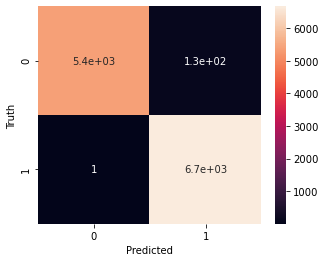

In [104]:
y_pred = model.predict(x_test)
P = model.predict_proba(x_test)

RC_Knn = recall_score(y_test,y_pred, average=None)
F1_Knn = f1_score(y_test, y_pred, average='macro')
AC_Knn = accuracy_score(y_test, y_pred)

print('Mean Recall =', RC_Knn[1])
print('Mean F1 Score =', F1_Knn)
print('Mean accuracy Score =', AC_Knn)

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Gradient Boosting
I classificatori di incremento del gradiente sono un gruppo di algoritmi di apprendimento automatico che combinano insieme molti modelli di apprendimento deboli per creare un modello predittivo forte.

Il Gradient Boosting è un algoritmo di classificazione basato sul metodo ensamble del Boosting. Con tale metodo si intende la creazione di una sequenza di classificatori dove la realizzazione dell' n-esimo si basa sull'esperienza degi n-1 classificatori che lo hanno preceduto.

In pratica, mentre il primo classificatore cerca di predire il target del nostro Dataset, il secondo ha come "nuovo target" la differenza tra il vero target e la predizione precedente. Stessa cosa per i successivi, in questo modo si giungerà ad una classificazione più precisa.  

In [62]:
model =GradientBoostingClassifier(max_depth= 11, min_samples_leaf= 3, learning_rate= 0.4,
                                  n_estimators= 130, max_features='sqrt', min_samples_split= 10,subsample= 1)
model.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.4, max_depth=11, max_features='sqrt',
                           min_samples_leaf=3, min_samples_split=10,
                           n_estimators=130, subsample=1)

In [109]:
model =GradientBoostingClassifier()

#tree-based parameters
param_test = {
    #'n_estimators':range(110,151,10), 
    #'max_depth':range(9,16,2), 
    #'min_samples_split':range(5,61,5), 
    #'min_samples_leaf':range(10,31,5)
    #'max_features':[None, 'sqrt', 'log2'], 
    #'subsample':[0.8,0.85,0.9,0.95],
    #'learning_rate':[0.4, 0.45, 0.35]
    }

gsearch = HalvingGridSearchCV(estimator = model, param_grid = param_test, scoring = 'f1_macro', n_jobs = 4, cv = 3)
gsearch.fit(x_train,y_train)

print(gsearch.best_params_)

{'min_samples_split': 15}


              precision    recall  f1-score   support

     class E       1.00      0.98      0.99      5513
     class P       0.99      1.00      0.99      6671

    accuracy                           0.99     12184
   macro avg       0.99      0.99      0.99     12184
weighted avg       0.99      0.99      0.99     12184



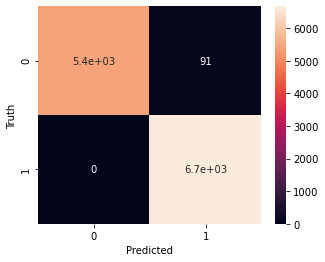

In [63]:
y_pred = model.predict(x_test)
P = model.predict_proba(x_test)

F1_GradBoost = f1_score(y_test, y_pred, average='macro')
AC_GradBoost = accuracy_score(y_test, y_pred)
RC_GradBoost = recall_score(y_test, y_pred,average=None)

print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# MLP

Un percettrone multistrato (MLP) è una rete neurale artificiale caratterizzata da diversi livelli di nodi di input collegati come un grafico diretto tra i livelli di input e di output. Ogni nodo utilizza una funzione di attivazione non lineare ad esempio una sigmoide che garantisce la "trasformazione" dell'output di un livello affinché possa essere immesso nel layer successivo e generare l'output finale.

L'addestramento della rete neurale prevede una fase iniziale di forward propagation tramite la quale viene inserito nella rete il dato di input e viene calcolata la relativa funzione di costo.

La seconda fase prevede la backpropagation, la rete viene quindi percorsa a ritroso, calcolando per ogni parametro la derivata della funzione costo questo permetterà di comprendere quali saranno gli aggiustamenti sui parametri che la rete dovrà compiere per minimizzare la relativa funzione di costo quindi fare in modo che il valore ottenuto sia quanto più vicino possibile al valore da predire.

In [64]:
model = MLPClassifier(activation = 'tanh', learning_rate= 'adaptive',learning_rate_init =0.04,
                      solver= 'sgd',alpha=0.0001,epsilon=0.001, hidden_layer_sizes= 350)
model.fit(x_train, y_train)

MLPClassifier(activation='tanh', epsilon=0.001, hidden_layer_sizes=350,
              learning_rate='adaptive', learning_rate_init=0.04, solver='sgd')

In [50]:
model = MLPClassifier()
param_grid = {
        #'hidden_layer_sizes': [(50, 100, 50), (200, 150, 200)] , (20, 20, 20)],
       # 'activation': ['relu', 'tanh'],
       # 'learning_rate': ['constant', 'adaptive'],
       # 'alpha': [0.000001, 0.0001, 0.00001],
        #'learning_rate_init': [0.04, 0.05, 0.03],
        #'solver': ['sgd', 'lbfgs', 'adam'],
       # 'epsilon': [0.01, 0.0001, 0.001]
}


gsearch = HalvingGridSearchCV(estimator= model,  param_grid = param_grid, scoring='f1_macro', cv=5, n_jobs=4)
gsearch.fit(x_train, y_train)
print(gsearch.best_params_)

{}


              precision    recall  f1-score   support

     class E       1.00      0.98      0.99      5513
     class P       0.98      1.00      0.99      6671

    accuracy                           0.99     12184
   macro avg       0.99      0.99      0.99     12184
weighted avg       0.99      0.99      0.99     12184



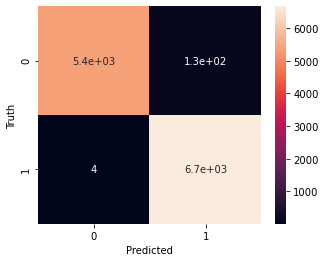

In [65]:
P = model.predict_proba(x_test)
y_pred = model.predict(x_test)

F1_MLP = f1_score(y_test, y_pred, average='macro')
AC_MLP = accuracy_score(y_test, y_pred)
RC_MLP = recall_score(y_test, y_pred,average=None)

print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Sommario classificatori

In [111]:
rows = [['Modello', 'Mean Recall P', 'Mean F1-score', 'Mean accuracy score'],
        ['Logistic Regression', RC_LogReg[1], F1_LogReg, AC_LogReg],
        ['Gaussian Naive Bayes', RC_GausNB[1], F1_GausNB, AC_GausNB],
        ['Quadratic discriminant analisys', RC_QDA[1], F1_QDA, AC_QDA],
        ['Support Vector Machine ', RC_SVC[1], F1_SVC, AC_SVC],
        ['Decision Tree', RC_DecTree[1], F1_DecTree, AC_DecTree],
        ['KNN', RC_Knn[1], F1_Knn, AC_Knn],
        ['Gradient Boosting ', RC_GradBoost[1], F1_GradBoost, AC_GradBoost],
        ['Random Forest', RC_RandFor[1], F1_RandFor, AC_RandFor],
        ['MLP', RC_MLP[1], F1_MLP, AC_MLP]
        ]

print(tabulate(rows, headers='firstrow'))

Modello                            Mean Recall P    Mean F1-score    Mean accuracy score
-------------------------------  ---------------  ---------------  ---------------------
Logistic Regression                     0.748314         0.603856               0.619665
Gaussian Naive Bayes                    0.631539         0.629719               0.631074
Quadratic discriminant analisys         0.75386          0.60453                0.62106
Support Vector Machine                  0.957877         0.942814               0.94345
Decision Tree                           0.9997           0.986297               0.986458
KNN                                     0.99985          0.989044               0.989166
Gradient Boosting                       1                0.992452               0.992531
Random Forest                           1                0.98921                0.98933
MLP                                     0.9994           0.989211               0.98933


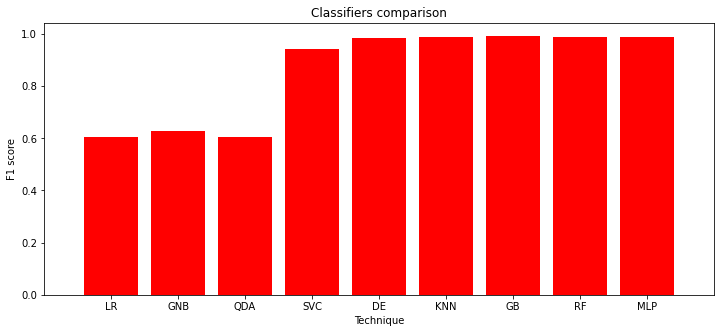

In [112]:
CC=['LR','GNB','QDA','SVC','DE','KNN', 'GB', 'RF','MLP']
F1=[F1_LogReg,F1_GausNB,F1_QDA,F1_SVC,F1_DecTree, F1_Knn,F1_GradBoost,F1_RandFor,F1_MLP]
RC=[RC_LogReg[1],RC_GausNB[1],RC_QDA[1],RC_SVC[1],RC_DecTree[1], RC_Knn[1],RC_GradBoost[1],RC_RandFor[1],RC_MLP[1]]
AC=[AC_LogReg,AC_GausNB,AC_QDA,AC_SVC,AC_DecTree,AC_Knn,AC_GradBoost,AC_RandFor,AC_MLP]
plt.figure(figsize = (12,5))
plt.title("Classifiers comparison")
plt.bar(range(9), F1, color = "r", align = "center")
plt.xticks(range(9), CC)
plt.ylabel("F1 score")
plt.xlabel("Technique") 
plt.xlim([-1,9])
plt.show()

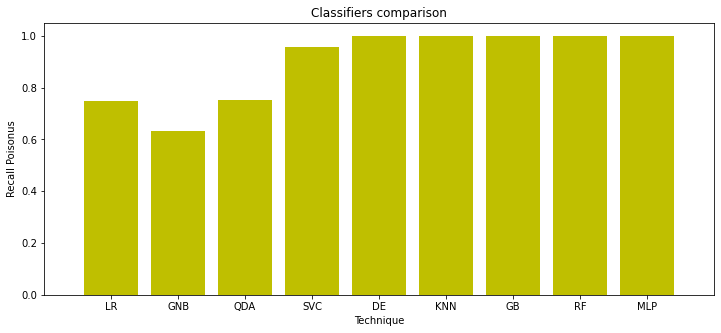

In [113]:
plt.figure(figsize = (12,5))
plt.title("Classifiers comparison")
plt.bar(range(9), RC, color = "y", align = "center")
plt.xticks(range(9), CC)
plt.ylabel("Recall Poisonus")
plt.xlabel("Technique") 
plt.xlim([-1,9])
plt.show()

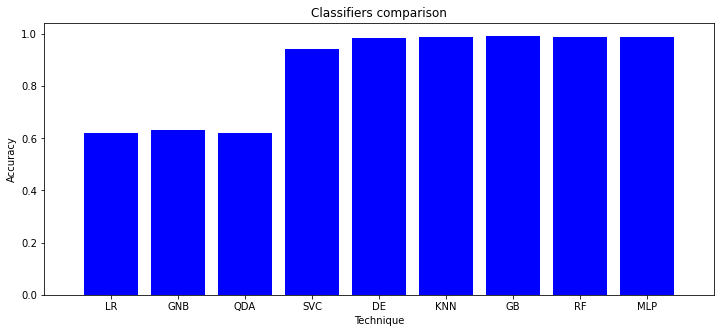

In [114]:
plt.figure(figsize = (12,5))
plt.title("Classifiers comparison")
plt.bar(range(9), AC, color = "b", align = "center")
plt.xticks(range(9), CC)
plt.ylabel("Accuracy")
plt.xlabel("Technique") 
plt.xlim([-1,9])
plt.show()

Dopo numerose prove è risultato evidente che alcuni dei classificatori precedentemente visti ottenevano prestazioni concorrenti. Ciò è dovuto allo shuffle iniziale, che però è necessario data la provenienza del Dataset. Pertanto di media si è osservato che il più performante tra questi, sia per F1-score sia (soprattutto) per la Recall dei Poisonous, è il Random Forest. 

una volta scelto il metodo di classficiazione da operare sui valori del dataset, è buona norma cercare di ottimizzarlo al meglio con l' ausilio di alcune tecniche di preprocessing quali scaling e resempling.

## SCALING
Nel machine learning lo scaling (o feature scaling) permette di normalizzare il range di variazione delle caratteristiche (feature) di un dataset.
E' una delle operazioni di pre-processing più utili perché migliora la qualità dei risultati finali. 
A parità di altre condizioni, lo scaling o scalatura riduce il tempo in cui l'algoritmo di apprendimento converge al risultato finale e migliora l'efficacia del modello statistico. Quando l'intervallo dei valori è molto variabile, la semplice distanza euclidea tra due due punti può diventare fuorviante.

Visto che il dataset è dominato da valori discreti (e anche quelli continui non hanno né un range elevato né un ordine di grandezza diverso da quelli discreti), l'operazione di scaling non darà grandi vantaggi, ma è ad ogni modo opportuno verificarlo.

### MinMaxScaler
Esistono diversi metodi di scaling dei dati. Uno dei più semplici è il ridimensionamento min-max. L'algoritmo di scaling individua il valore minimo e massimo tra i valori di una caratteristica x. 


{ min ( x ) max ( x )
Poi sostituisce ogni valore xi con il valore x'i normalizzato $${x'i = \frac{xi−min(x)}{max(x)−min(x)}}$$ 

Dove xi è il valore originale mentre x'i è il valore normalizzato. In questo modo i dati diventano omogenei in una scala da 0 a 1.

In [70]:
features=["cap-diameter" , "cap-shape", "cap-surface", "cap-color", "does-bruise-or-bleed", "gill-attachment", "gill-spacing",
         "gill-color", "stem-height","stem-width", "stem-surface", "stem-color", "has-ring", "ring-type", "habitat", "season" ]

In [71]:
scaler = MinMaxScaler()                                    
scaler.fit(x_train)
MM_ms=scaler.transform(x_train)
scaler.fit(x_test)
MM_ts=scaler.transform(x_test)


MMms = pd.DataFrame(MM_ms, columns = features)
MMts = pd.DataFrame(MM_ts, columns =  features)


x_traic=MMms
x_tesc=MMts

### MaxAbsScaler
Ridimensiona ogni caratteristica in base al suo valore assoluto massimo.

Questo stimatore ridimensiona e traduce ciascuna caratteristica individualmente in modo tale che il valore assoluto massimo di ciascuna caratteristica nel set di addestramento sia 1,0.

In [72]:
scaler = MaxAbsScaler() 
scaler.fit(x_train)
MA_ms=scaler.transform(x_train)
scaler.fit(x_test)
MA_ts=scaler.transform(x_test)


MAms = pd.DataFrame(MA_ms, columns = features)
MAts = pd.DataFrame(MA_ts, columns = features)


x_traim=MAms  
x_tesm=MAts 

### QuantileTransformer

Trasforma le caratteristiche usando le informazioni sui quantili.

Questo metodo trasforma le features per seguire una distribuzione uniforme o normale. Pertanto, per una data feature, questa trasformazione tende a disperdere i valori più frequenti. Riduce anche l'impatto dei valori anomali (marginali): si tratta quindi di un solido schema di preelaborazione.

La trasformazione viene applicata a ciascuna funzione in modo indipendente. Per prima cosa viene utilizzata una stima della funzione di distribuzione cumulativa di una caratteristica per mappare i valori originali su una distribuzione uniforme. I valori ottenuti vengono quindi mappati sulla distribuzione di output desiderata utilizzando la funzione quantile associata. I valori delle features dei dati nuovi/non visti che cadono al di sotto o al di sopra dell'intervallo adattato verranno mappati ai limiti della distribuzione di output. Si noti che questa trasformazione non è lineare.

In [73]:
scaler = QuantileTransformer(n_quantiles=10) 
scaler.fit(x_train)
QT_ms=scaler.transform(x_train)
scaler.fit(x_test)
QT_ts=scaler.transform(x_test)
                            

QTms = pd.DataFrame(QT_ms, columns = features)

QTts = pd.DataFrame(QT_ts, columns = features)

x_traiq=QTms
x_tesq=QTts

è verificato di seguito che lo scaling dei dati non comporta alcun sostanziale miglioramento nei risultati ottenuti dal classificatore scelto.

Mean Recall = 0.9216009593764053
Mean F1 Score = 0.7833296965063463
Mean accuracy Score = 0.7934175968483257


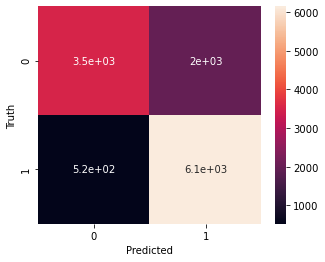

In [80]:
model = RandomForestClassifier(min_samples_leaf=1, min_samples_split= 4, n_estimators= 100)
model.fit(x_traic, y_train)
y_pred = model.predict(x_tesc)
P = model.predict_proba(x_tesc)

RC_RandFor_c = recall_score(y_test,y_pred, average=None)
F1_RandFor_c = f1_score(y_test, y_pred, average='macro')
AC_RandFor_c = accuracy_score(y_test, y_pred)

print('Mean Recall =', RC_RandFor_c[1])
print('Mean F1 Score =', F1_RandFor_c)
print('Mean accuracy Score =', AC_RandFor_c)

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Mean Recall = 0.9230999850097437
Mean F1 Score = 0.7713034825531324
Mean accuracy Score = 0.7831582403151675


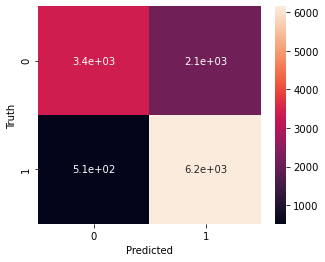

In [81]:
model = RandomForestClassifier(min_samples_leaf=1, min_samples_split= 4, n_estimators= 100)
model.fit(x_traim, y_train)
y_pred = model.predict(x_tesm)
P = model.predict_proba(x_tesm)

RC_RandFor_m = recall_score(y_test,y_pred, average=None)
F1_RandFor_m = f1_score(y_test, y_pred, average='macro')
AC_RandFor_m = accuracy_score(y_test, y_pred)

print('Mean Recall =', RC_RandFor_m[1])
print('Mean F1 Score =', F1_RandFor_m)
print('Mean accuracy Score =', AC_RandFor_m)

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Mean Recall = 1.0
Mean F1 Score = 0.988710480269789
Mean accuracy Score = 0.9888378200919238


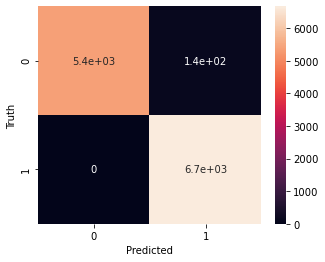

In [82]:
model = RandomForestClassifier(min_samples_leaf=1, min_samples_split= 4, n_estimators= 100)
model.fit(x_traiq, y_train)
y_pred = model.predict(x_tesq)
P = model.predict_proba(x_tesq)

RC_RandFor_q = recall_score(y_test,y_pred,average=None)
F1_RandFor_q = f1_score(y_test, y_pred, average='macro')
AC_RandFor_q = accuracy_score(y_test, y_pred)

print('Mean Recall =', RC_RandFor_q[1])
print('Mean F1 Score =', F1_RandFor_q)
print('Mean accuracy Score =', AC_RandFor_q)

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

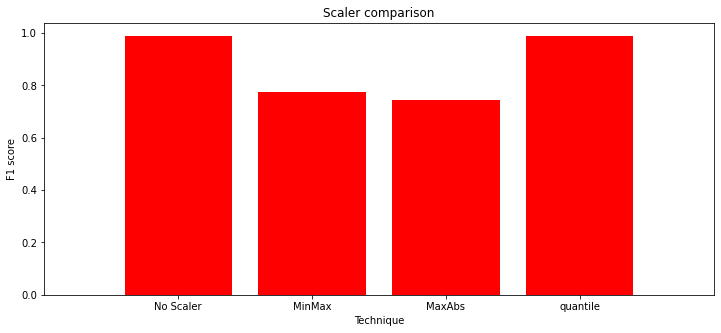

In [77]:
SC=['No Scaler','MinMax','MaxAbs','quantile']
F1S=[F1_RandFor,F1_RandFor_c,F1_RandFor_m,F1_RandFor_q]
RCS=[RC_RandFor[1],RC_RandFor_c[1],RC_RandFor_m[1],RC_RandFor_q[1]]
ACS=[AC_RandFor,AC_RandFor_c,AC_RandFor_m,AC_RandFor_q]
plt.figure(figsize = (12,5))
plt.title("Scaler comparison")
plt.bar(range(4), F1S, color = "r", align = "center")
plt.xticks(range(4), SC)
plt.ylabel("F1 score")
plt.xlabel("Technique") 
plt.xlim([-1,4])
plt.show()

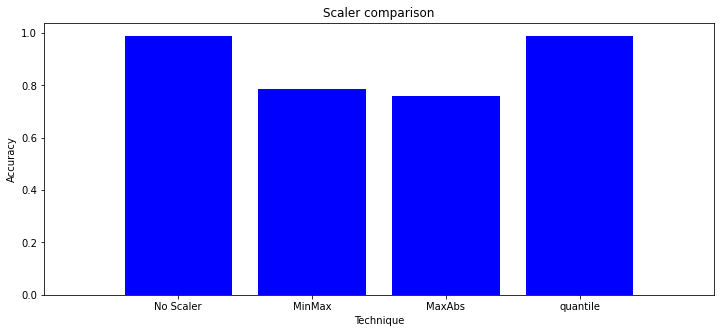

In [78]:
plt.figure(figsize = (12,5))
plt.title("Scaler comparison")
plt.bar(range(4), ACS, color = "b", align = "center")
plt.xticks(range(4), SC)
plt.ylabel("Accuracy")
plt.xlabel("Technique") 
plt.xlim([-1,4])
plt.show()

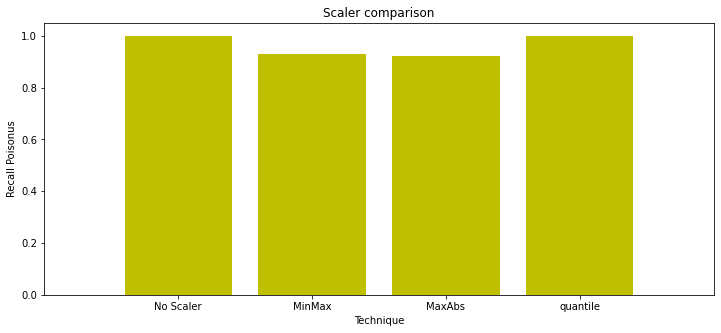

In [79]:
plt.figure(figsize = (12,5))
plt.title("Scaler comparison")
plt.bar(range(4), RCS, color = "y", align = "center")
plt.xticks(range(4), SC)
plt.ylabel("Recall Poisonus")
plt.xlabel("Technique") 
plt.xlim([-1,4])
plt.show()

Come già previsto in precedenza con l'ausilio dei vari grafici si è dimostrato che per il nostro problema è superfluo l'utilizzo dell'operazione di scaling dei valori del dataset.

## RESAMPLING
La fase di apprendimento e la successiva previsione degli algoritmi di machine learning possono essere influenzate dal problema del dataset sbilanciato, che corrisponde alla differenza del numero di campioni nelle diverse classi.  

Per bilanciare un training set esistono diversi metodi: under-sampling, over-sampling, e la combinazione di over e under sampling. 
 
Over-sampling viene utilizzato quando la quantità di dati è insufficiente. Tenta di bilanciare il set di dati aumentando la dimensione dei campioni di minoranza. Piuttosto che eliminare i campioni di maggioranza, vengono generati nuovi campioni di minoranza. Fanno parte degli algoritmi di Over-sampling lo SMOTE e il RandomOverSampler. 

D’altro canto Under-sampling bilancia il dataset riducendo la dimensione della classe di maggioranza, per esempio mantenendo tutti i campioni nella classe di minoranza e selezionando casualmente un numero uguale di campioni nella classe di maggioranza. Questo metodo viene utilizzato quando la quantità di dati a disposizione è sufficiente. Tra gli algoritmi di Under-sampling troviamo TomekLinks e RandomUnderSampler.

Lo SMOTETomek è invece un esempio di algoritmo ibrido.

Visto che il nostro dataset è bilanciato ( il numero degli elementi fra le due classi è circa lo stesso), l'operazione di resampling non darà grandi vantaggi, ma è ad ogni modo opportuno verificarlo.

#### RandomUnderSampler

Elimina casualmente alcuni elementi della classe di maggioranza

Mean Recall = 0.9997001948733323
Mean F1 Score = 0.9886280699405773
Mean accuracy Score = 0.9887557452396586


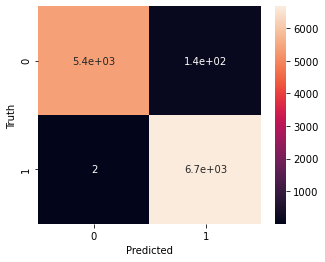

In [83]:
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x_train,y_train)

model = RandomForestClassifier(min_samples_leaf=1, min_samples_split= 4, n_estimators= 100)
model.fit(x_rus, y_rus)
y_pred = model.predict(x_test)
P = model.predict_proba(x_test)

RC_RandFor_rus = recall_score(y_test,y_pred, average=None)
F1_RandFor_rus = f1_score(y_test, y_pred, average='macro')
AC_RandFor_rus = accuracy_score(y_test, y_pred)

print('Mean Recall =', RC_RandFor_rus[1])
print('Mean F1 Score =', F1_RandFor_rus)
print('Mean accuracy Score =', AC_RandFor_rus)

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### RandomOverSampler

Duplica casualmente alcuni elementi della classe di minoranza

Mean Recall = 1.0
Mean F1 Score = 0.9892928764612017
Mean accuracy Score = 0.9894123440577807


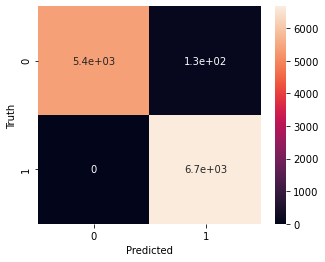

In [84]:
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x_train,y_train)

model = RandomForestClassifier(min_samples_leaf=1, min_samples_split= 4, n_estimators= 100)
model.fit(x_ros, y_ros)
y_pred = model.predict(x_test)
P = model.predict_proba(x_test)

RC_RandFor_ros = recall_score(y_test,y_pred,average=None)
F1_RandFor_ros = f1_score(y_test, y_pred, average='macro')
AC_RandFor_ros = accuracy_score(y_test, y_pred)

print('Mean Recall =', RC_RandFor_ros[1])
print('Mean F1 Score =', F1_RandFor_ros)
print('Mean accuracy Score =', AC_RandFor_ros)

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### TomekLinks


Mean Recall = 0.9998500974366662
Mean F1 Score = 0.9887940835180872
Mean accuracy Score = 0.9889198949441891


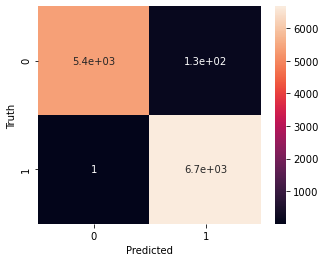

In [85]:
rts = TomekLinks()
x_rts, y_rts = rts.fit_resample(x_train,y_train)

model = RandomForestClassifier(min_samples_leaf=1, min_samples_split= 4, n_estimators= 100)
model.fit(x_rts, y_rts)
y_pred = model.predict(x_test)
P = model.predict_proba(x_test)

RC_RandFor_rts = recall_score(y_test,y_pred, average=None)
F1_RandFor_rts = f1_score(y_test, y_pred, average='macro')
AC_RandFor_rts = accuracy_score(y_test, y_pred)

print('Mean Recall =', RC_RandFor_rts[1])
print('Mean F1 Score =', F1_RandFor_rts)
print('Mean accuracy Score =', AC_RandFor_rts)

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### SMOTE

Mean Recall = 1.0
Mean F1 Score = 0.9891264929192092
Mean accuracy Score = 0.9892481943532502


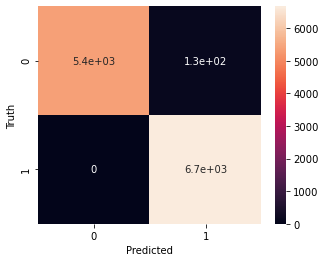

In [86]:
rss = SMOTE(random_state=42)
x_rss, y_rss = rss.fit_resample(x_train,y_train)

model = RandomForestClassifier(min_samples_leaf=1, min_samples_split= 4, n_estimators= 100)
model.fit(x_rss, y_rss)
y_pred = model.predict(x_test)
P = model.predict_proba(x_test)

RC_RandFor_rss = recall_score(y_test,y_pred, average=None)
F1_RandFor_rss = f1_score(y_test, y_pred, average='macro')
AC_RandFor_rss = accuracy_score(y_test, y_pred)

print('Mean Recall =', RC_RandFor_rss[1])
print('Mean F1 Score =', F1_RandFor_rss)
print('Mean accuracy Score =', AC_RandFor_rss)

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### SMOTETomek

Il processo di SMOTE-Tomek Links è il seguente. (Inizio di SMOTE) Scegli dati casuali dalla classe di minoranza. Calcola la distanza tra i dati casuali e i suoi k vicini più vicini. Moltiplica la differenza per un numero casuale compreso tra 0 e 1, quindi aggiungi il risultato alla classe di minoranza come campione sintetico.

Mean Recall = 1.0
Mean F1 Score = 0.988960097095597
Mean accuracy Score = 0.9890840446487197


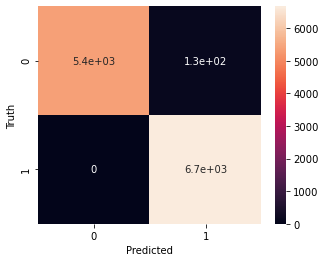

In [87]:
rst = SMOTETomek(random_state=42)
x_rst, y_rst = rst.fit_resample(x_train,y_train)

model = RandomForestClassifier(min_samples_leaf=1, min_samples_split= 4, n_estimators= 100)
model.fit(x_rst, y_rst)
y_pred = model.predict(x_test)
P = model.predict_proba(x_test)

RC_RandFor_rst = recall_score(y_test,y_pred, average=None)
F1_RandFor_rst = f1_score(y_test, y_pred, average='macro')
AC_RandFor_rst = accuracy_score(y_test, y_pred)

print('Mean Recall =', RC_RandFor_rst[1])
print('Mean F1 Score =', F1_RandFor_rst)
print('Mean accuracy Score =', AC_RandFor_rst)

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [88]:
rows = [['Modello', 'Mean Recall Poisonous', 'Mean F1-score', 'Mean accuracy score'],
        ['Random Forest', RC_RandFor[1], F1_RandFor, AC_RandFor],
        ['Random Forest_rus', RC_RandFor_rus[1], F1_RandFor_rus, AC_RandFor_rus],
        ['Random Forest_ros', RC_RandFor_ros[1], F1_RandFor_ros, AC_RandFor_ros],
        ['Random Forest_rts', RC_RandFor_rts[1], F1_RandFor_rts, AC_RandFor_rts],
        ['Random Forest_rss', RC_RandFor_rss[1], F1_RandFor_rss, AC_RandFor_rss],
        ['Random Forest_rst', RC_RandFor_rst[1], F1_RandFor_rst, AC_RandFor_rst]    
        ]

print(tabulate(rows, headers='firstrow'))

Modello              Mean Recall Poisonous    Mean F1-score    Mean accuracy score
-----------------  -----------------------  ---------------  ---------------------
Random Forest                      1               0.98921                0.98933
Random Forest_rus                  0.9997          0.988628               0.988756
Random Forest_ros                  1               0.989293               0.989412
Random Forest_rts                  0.99985         0.988794               0.98892
Random Forest_rss                  1               0.989126               0.989248
Random Forest_rst                  1               0.98896                0.989084


Come si evince dalla tabella sovrastante, le supposizioni sul resampling fatte in precedenza sono state confermate. Esso non comporta un tangibile miglioramento in nessuno degli scores presi in considerazione. Anche se le due classi presentano una differenza di cardinalità di alcune migliaia, ognuna di esse possiede abbastanza elementi da permettere la realizzazione di un classificatore efficiente. Classificatore che non viene migliorato con metodi di Under-sampling, Over-sampling o ibridi tra i due.

## APPLICAZIONE FEATRUES SELECTION AND EXTRACTION

Si procede con l'applicazione del modello Random Forest ai vari Dataset realizzati precedentemente tramite features selection o extraction. La dimensionalità del Dataset originale, ripulito delle features con un numero eccessivo di valori Null è di per sè poco elevata, pertanto non sono previsti né miglioramenti dal punto di vista del carico computazionale né sostanziali peggioramenti riguardo alle predizioni. 

### Random Forest con Mutua Informazione

In [89]:
model = RandomForestClassifier(min_samples_leaf=1, min_samples_split= 4, n_estimators= 100)
model.fit(x_train_mi, y_train)

RandomForestClassifier(min_samples_split=4)

              precision    recall  f1-score   support

     class E       1.00      0.98      0.99      5513
     class P       0.98      1.00      0.99      6671

    accuracy                           0.99     12184
   macro avg       0.99      0.99      0.99     12184
weighted avg       0.99      0.99      0.99     12184



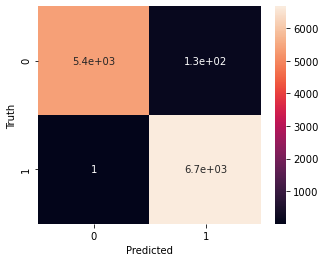

In [90]:
y_pred = model.predict(x_test_mi)
P = model.predict_proba(x_test_mi)

F1_RandFor_mi = f1_score(y_test, y_pred, average='macro')
AC_RandFor_mi = accuracy_score(y_test, y_pred)
RC_RandFor_mi = recall_score(y_test, y_pred,average=None)

print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Random Forest con Matrice di Correlazione

In [91]:
model = RandomForestClassifier(min_samples_leaf=1, min_samples_split= 4, n_estimators= 100)
model.fit(x_train_mc, y_train)

RandomForestClassifier(min_samples_split=4)

              precision    recall  f1-score   support

     class E       1.00      0.98      0.99      5513
     class P       0.98      1.00      0.99      6671

    accuracy                           0.99     12184
   macro avg       0.99      0.99      0.99     12184
weighted avg       0.99      0.99      0.99     12184



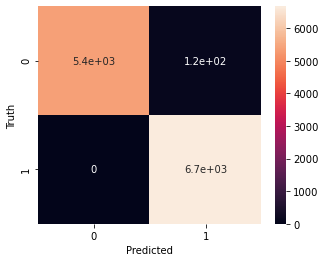

In [92]:
y_pred = model.predict(x_test_mc)
P = model.predict_proba(x_test_mc)

F1_RandFor_mc = f1_score(y_test, y_pred, average='macro')
AC_RandFor_mc = accuracy_score(y_test, y_pred)
RC_RandFor_mc = recall_score(y_test, y_pred,average=None)

print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Random Forest con Decisional Tree

In [93]:
model = RandomForestClassifier(min_samples_leaf=1, min_samples_split= 4, n_estimators= 100)
model.fit(x_train_dt, y_train)

RandomForestClassifier(min_samples_split=4)

              precision    recall  f1-score   support

     class E       1.00      0.98      0.99      5513
     class P       0.98      1.00      0.99      6671

    accuracy                           0.99     12184
   macro avg       0.99      0.99      0.99     12184
weighted avg       0.99      0.99      0.99     12184



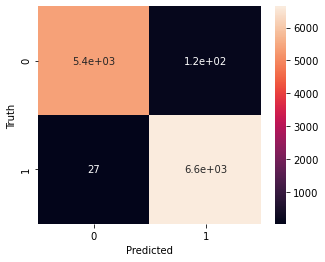

In [94]:
y_pred = model.predict(x_test_dt)
P = model.predict_proba(x_test_dt)

F1_RandFor_dt = f1_score(y_test, y_pred, average='macro')
AC_RandFor_dt = accuracy_score(y_test, y_pred)
RC_RandFor_dt = recall_score(y_test, y_pred,average=None)

print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Random Forest con PCA

In [95]:
model = RandomForestClassifier(min_samples_leaf=1, min_samples_split= 4, n_estimators= 100)
model.fit(x_train_pca, y_train)

RandomForestClassifier(min_samples_split=4)

              precision    recall  f1-score   support

     class E       1.00      0.99      1.00      5513
     class P       1.00      1.00      1.00      6671

    accuracy                           1.00     12184
   macro avg       1.00      1.00      1.00     12184
weighted avg       1.00      1.00      1.00     12184



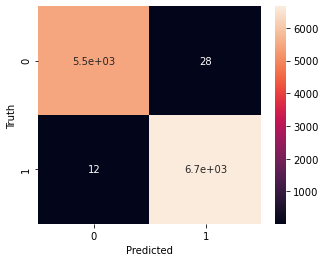

In [96]:
y_pred = model.predict(x_test_pca)
P = model.predict_proba(x_test_pca)

F1_RandFor_pca = f1_score(y_test, y_pred, average='macro')
AC_RandFor_pca = accuracy_score(y_test, y_pred)
RC_RandFor_pca = recall_score(y_test, y_pred,average=None)

print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)

# Stampiamo la matrice di confusione
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True, xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [97]:
rows = [['Modello', 'Mean Recall Poisonous', 'Mean F1-score', 'Mean accuracy score'],
        ['Random Forest', RC_RandFor[1], F1_RandFor, AC_RandFor],
        ['Random Forest_mi', RC_RandFor_mi[1], F1_RandFor_mi, AC_RandFor_mi],
        ['Random Forest_mc', RC_RandFor_mc[1], F1_RandFor_mc, AC_RandFor_mc],
        ['Random Forest_dt', RC_RandFor_dt[1], F1_RandFor_dt, AC_RandFor_dt],
        ['Random Forest_pca', RC_RandFor_pca[1], F1_RandFor_pca, AC_RandFor_pca],
         ]

print(tabulate(rows, headers='firstrow'))

Modello              Mean Recall Poisonous    Mean F1-score    Mean accuracy score
-----------------  -----------------------  ---------------  ---------------------
Random Forest                     1                0.98921                0.98933
Random Forest_mi                  0.99985          0.98896                0.989084
Random Forest_mc                  1                0.989958               0.990069
Random Forest_dt                  0.995953         0.987806               0.987935
Random Forest_pca                 0.998201         0.996686               0.996717


# Conclusioni

Lo studio sulla classificazione in base all'edibilità dei funghi basato su un dataset di 61069 elementi caratterizzati da 20 features oltre alla classe è iniziato con la fase di pre-processing. In essa si è inizialmente analizzato il dataset, riscontrando la presenza, per la maggior parte delle features, di variabili categoriche.
L'utilizzo della LabelEncoder() ha risolto il problema.

Si è proceduto con l'applicazione dei metodi di features selection sul dataset al fine di gestire le problematiche relative ai valori Null( le feature composte per oltre l'80% dei valori dall'attributo Null sono state eliminate, mentre le restanti sono state gestitite andando a sostituire il valore con un carattere opportuno). In questa fase risulta rilevante anche la gestione degli outliers seppur limitata per ovvie ragioni alle tre features a valori continui. 

Essendovi una grande prevalenza di valori discreti, tutti dello stesso ordine di grandezza al quale appertengono anche i pochi valori continui rimasti tra le features, si è concluso che l'utilizzo di uno Scaler sarebbe potuto essere vano se non direttamente controproducente. Tale ipotesi troverà poi conferma nelle successive verifiche in seguito alla scelta del miglior classificatore.

Anche per il Resampling si è fatta una considerazione simile, dovuta in questo caso al bilanciamento tra le cardinalità delle due classi e al più che sufficiente numero di elementi del dataset. Anche in questo caso successive verifiche proveranno la veridicità delle affermazione fatte.

Nella fase di classificazione, sebbene la natura del dataset rendesse chiara l'idea che classificatori basati su alberi fossero migliori di quelli lineari, ne sono stati testati diversi. Tra tutti il Random Forest è stato eletto il migliore in base ad F1 score, accuracy e soprattutto la Recall dei Poisonous. Pertanto i vari scaler e metodi di resampling sono stati successivamente testati tramite esso, evidenziando il fatto che le supposizioni iniziali fossero corrette.

Tra i vari Dataset testati, quello con le migliori prestazioni (seppur di un valore infinitesimo) si è rivelato essere quello ottenuto tramite la matrice di correlazione, con la quale la feature "stem-widht" è stata eliminata poiché estremamente correlata con la " cap-diameter".

Quindi, in conclusione, sebbene non sia stato possibile classificare correttamente ed ottenere il 100% nell'F1-score, lo è stato quantomeno per il raggiungimento del valore massimo per la metrica Recall dei Poisonous, permettendo così di classificare correttamente tutti i funghi appartenenti alla classe P.